In [170]:
import pickle
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from scipy.sparse import hstack
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold, MultilabelStratifiedShuffleSplit
import pandas as pd
from sklearn.model_selection import train_test_split

In [172]:
# Load TF-IDF features from pickle
with open('features/tfidf_features.pkl', 'rb') as f:
    tfidf_features = pickle.load(f)
    X_tfidf = tfidf_features['matrix']

with open('features/bigram_features.pkl', 'rb') as f:
    bigram_features = pickle.load(f)
    X_bigram = bigram_features['matrix']

with open('features/movies_features.pkl', 'rb') as f:
    movies_features = pickle.load(f)

    movies_clean = movies_features['data']
    genres = movies_features['genres']

X_combined = hstack([X_tfidf, X_bigram])

In [32]:
print("First genre_ids:", df['genre_ids'].iloc[0])
print("Type:", type(df['genre_ids'].iloc[0]))

# If it's a string representation of a list
if isinstance(df['genre_ids'].iloc[0], str):
    print("Needs parsing from string")
    print("After eval:", eval(df['genre_ids'].iloc[0]))
else:
    print("Already in proper format")
print("\nFirst 5 entries:")
print(df['genre_ids'].head())

First genre_ids: [18, 80]
Type: <class 'str'>
Needs parsing from string
After eval: [18, 80]

First 5 entries:
0           [18, 80]
1           [18, 80]
2           [18, 80]
3    [18, 36, 10752]
4               [18]
Name: genre_ids, dtype: object


In [23]:
# Check the aviability of GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


# Testing

In [ ]:
# # Make a dataset for df
# class MovieGenreDataset(Dataset):
#     def __init__(self, features, y):
#         self.features = features
#         self.y = y
#         self.num_classes = len({genre for genre_list in y for genre in genre_list})

#     def __len__(self):
#         return len(self.features)

#     def __getitem__(self, idx):
#         text_features = torch.tensor(self.features, dtype=torch.float32).squeeze(0)
#         labels = torch.tensor(self.y[idx], dtype=torch.float32)
#         return text_features, labels
    
#     def get_num_classes(self):
#         return self.num_classes

In [ ]:
# class GRUClassifier(torch.nn.Module):
#     def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers, output_size, dropout_rate):
#         super(GRUClassifier, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
        
#         # Embedding layer
#         self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        
#         # GRU layer
#         self.gru = torch.nn.GRU(
#             input_size=embedding_dim,
#             hidden_size=hidden_size,
#             num_layers=num_layers,
#             batch_first=True,
#             bidirectional=True,  # Use bidirectional GRU for better performance
#             dropout=dropout_rate if num_layers > 1 else 0
#         )
        
#         # Dropout layer
#         self.dropout = torch.nn.Dropout(dropout_rate)
        
#         # Output layer (multiply hidden_size by 2 because of bidirectional)
#         self.fc = torch.nn.Linear(hidden_size * 2, output_size)
        
#     def forward(self, x):
#         # Input shape: (batch_size, sequence_length)
        
#         # Embedding layer
#         embedded = self.embedding(x)  # Shape: (batch_size, sequence_length, embedding_dim)
        
#         # Initialize hidden state
#         h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        
#         # GRU forward pass
#         out, _ = self.gru(embedded, h0)  # out shape: (batch_size, sequence_length, hidden_size*2)
        
#         # Get the output from the last time step
#         out = self.dropout(out[:, -1, :])
        
#         # Pass through linear layer
#         out = self.fc(out)
        
#         return out


In [ ]:
# batch_size = 32

# X_temp, X_test, y_temp, y_test = train_test_split(
#     df["cleaned_overview"].values, genres, test_size=0.2, random_state=42
# )

# # Second split: separate train and validation from temp (0.8 * 0.8 = 64% train, 0.8 * 0.2 = 16% val)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_temp, y_temp, test_size=0.2, random_state=42
# )

# # Create datasets for each split
# train_dataset = MovieGenreDataset(X_train, y_train)
# val_dataset = MovieGenreDataset(X_val, y_val)
# test_dataset = MovieGenreDataset(X_test, y_test)

# # Create dataloaders for each split
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=batch_size)
# test_loader = DataLoader(test_dataset, batch_size=batch_size)

# print(f"Training samples: {len(train_dataset)}")
# print(f"Validation samples: {len(val_dataset)}")
# print(f"Testing samples: {len(test_dataset)}")

Training samples: 6380
Validation samples: 1596
Testing samples: 1995


In [ ]:
# vocabulary = movies_clean['cleaned_overview'].map(str.split).explode().unique()

# # Updated hyperparameters
# vocab_size = len(vocabulary)  # Get from your tokenizer/vocabulary
# embedding_dim = 100
# hidden_size = 128
# num_layers = 2
# output_size = train_dataset.get_num_classes()
# dropout_rate = 0.5

# # Initialize model
# model = GRUClassifier(
#     vocab_size=vocab_size,
#     embedding_dim=embedding_dim,
#     hidden_size=hidden_size,
#     num_layers=num_layers,
#     output_size=output_size,
#     dropout_rate=dropout_rate
# )

In [ ]:
# print(model)

GRUClassifier(
  (embedding): Embedding(27511, 100)
  (gru): GRU(100, 128, num_layers=2, batch_first=True, dropout=0.5, bidirectional=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=18, bias=True)
)


In [ ]:
# def train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001):
#     criterion = torch.nn.BCEWithLogitsLoss()  # Use BCEWithLogitsLoss for multilabel classification
#     optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
#     model.to(device)
    
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss = 0.0
        
#         for features, labels in train_loader:
#             features, labels = features.to(device), labels.to(device)
            
#             optimizer.zero_grad()
#             outputs = model(features)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()
            
#             running_loss += loss.item()
        
#         avg_loss = running_loss / len(train_loader)
#         print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
        
#         # Validation step
#         model.eval()
#         val_loss = 0.0
#         with torch.no_grad():
#             for features, labels in val_loader:
#                 features, labels = features.to(device), labels.to(device)
#                 outputs = model(features)
#                 loss = criterion(outputs, labels)
#                 val_loss += loss.item()
        
#         avg_val_loss = val_loss / len(val_loader)
#         print(f"Validation Loss: {avg_val_loss:.4f}")
    
#     print("Training complete.")

In [ ]:
# train_model(model, train_loader, val_loader, num_epochs=10, learning_rate=0.001)

TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint64, uint32, uint16, uint8, and bool.

# Main code

In [92]:
class MovieGenreDataset(Dataset):
    def __init__(self, X, genres, mlb=None, is_train=False):
        # Convert sparse matrix to dense tensor
        self.features = torch.FloatTensor(X.toarray())
        
        # Convert genres to multi-hot encoding
        if is_train:
            self.mlb = MultiLabelBinarizer()
            self.labels = torch.FloatTensor(self.mlb.fit_transform(genres))
        elif mlb is not None:
            self.mlb = mlb
            self.labels = torch.FloatTensor(self.mlb.transform(genres))
        else:
            raise ValueError("Must provide MLBinarizer for val/test sets")
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
    def get_num_classes(self):
        return len(self.mlb.classes_)
    
    def get_mlb(self):
        return self.mlb


In [176]:
# First split: separate test set (80% train+val, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(
    movies_clean["cleaned_overview"], movies_clean['genres'], test_size=0.2, random_state=42
)

# Second split: separate train and validation from temp (0.8 * 0.8 = 64% train, 0.8 * 0.2 = 16% val)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42
)

tfidf_vec = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
bigram = CountVectorizer(ngram_range=(2, 2), max_features=1000)
X_train_tfidf = tfidf_vec.fit_transform(X_train)
X_val_tfidf = tfidf_vec.transform(X_val)
X_test_tfidf = tfidf_vec.transform(X_test)
X_train_bigram = bigram.fit_transform(X_train)
X_val_bigram = bigram.transform(X_val)
X_test_bigram = bigram.transform(X_test)

# Combine TF-IDF and bigram features
X_train = hstack([X_train_tfidf, X_train_bigram])
X_val = hstack([X_val_tfidf, X_val_bigram])
X_test = hstack([X_test_tfidf, X_test_bigram])

# Create datasets for each split
train_dataset = MovieGenreDataset(X_train, y_train, is_train=True)
mlb = train_dataset.get_mlb()
val_dataset = MovieGenreDataset(X_val, y_val, mlb=mlb)
test_dataset = MovieGenreDataset(X_test, y_test, mlb=mlb)

print(f"Training samples: {len(train_dataset)}")
print(f"Validation samples: {len(val_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Training samples: 6380
Validation samples: 1596
Testing samples: 1995


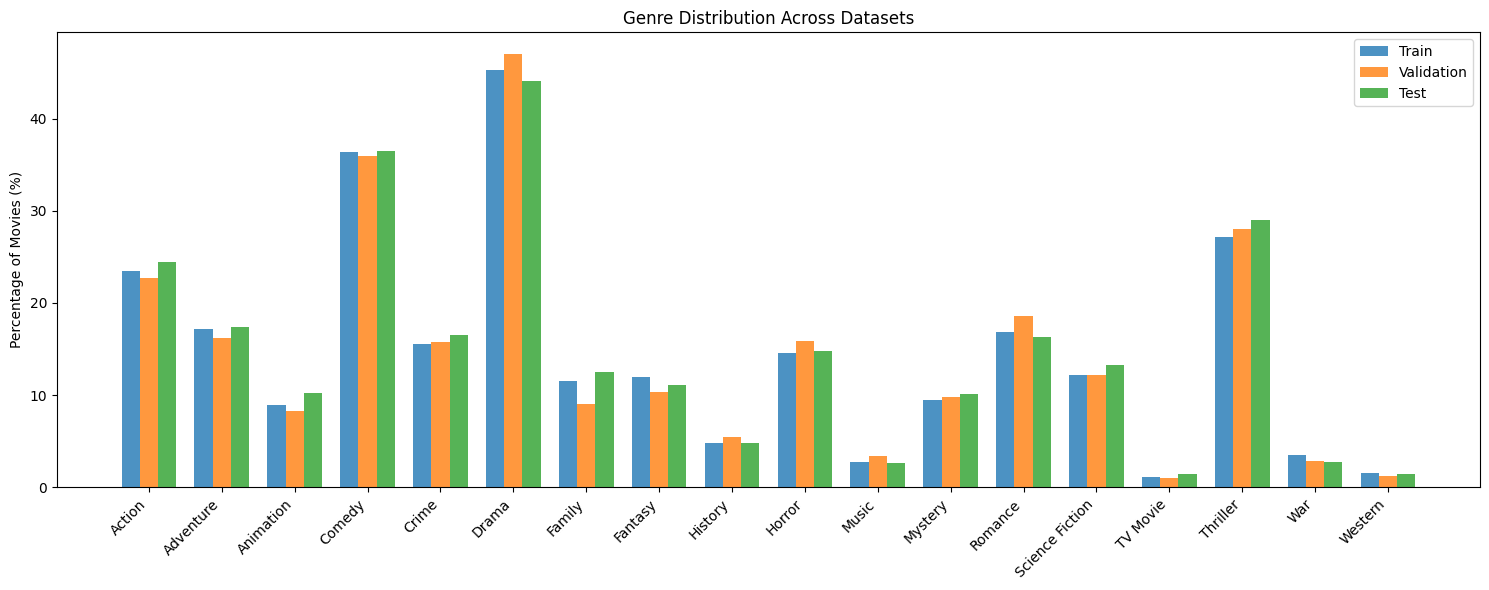


Genre distribution (%):
Genre              Train   Validation     Test
---------------------------------------------
Action             23.46        22.74    24.46
Adventure          17.15        16.23    17.39
Animation           8.95         8.27    10.28
Comedy             36.36        35.96    36.44
Crime              15.53        15.73    16.54
Drama              45.28        46.99    44.11
Family             11.57         9.02    12.53
Fantasy            11.96        10.40    11.13
History             4.80         5.45     4.86
Horror             14.53        15.85    14.79
Music               2.71         3.38     2.61
Mystery             9.53         9.77    10.13
Romance            16.83        18.55    16.34
Science Fiction    12.16        12.16    13.28
TV Movie            1.16         1.00     1.45
Thriller           27.12        28.07    29.02
War                 3.48         2.88     2.81
Western             1.60         1.25     1.50


In [177]:
import numpy as np

import matplotlib.pyplot as plt

# Get labels for each dataset
train_labels = train_dataset.labels.numpy()
val_labels = val_dataset.labels.numpy()
test_labels = test_dataset.labels.numpy()

# Calculate the percentage of each genre in each dataset
train_dist = train_labels.sum(axis=0) / len(train_labels) * 100
val_dist = val_labels.sum(axis=0) / len(val_labels) * 100
test_dist = test_labels.sum(axis=0) / len(test_labels) * 100

# Get genre names
genre_names = train_dataset.mlb.classes_

# Create a bar plot
fig, ax = plt.subplots(figsize=(15, 6))

x = np.arange(len(genre_names))
width = 0.25

ax.bar(x - width, train_dist, width, label='Train', alpha=0.8)
ax.bar(x, val_dist, width, label='Validation', alpha=0.8)
ax.bar(x + width, test_dist, width, label='Test', alpha=0.8)

ax.set_ylabel('Percentage of Movies (%)')
ax.set_title('Genre Distribution Across Datasets')
ax.set_xticks(x)
ax.set_xticklabels(genre_names, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

# Print exact percentages
print("\nGenre distribution (%):")
print(f"{'Genre':<15} {'Train':>8} {'Validation':>12} {'Test':>8}")
print("-" * 45)
for i, genre in enumerate(genre_names):
    print(f"{genre:<15} {train_dist[i]:8.2f} {val_dist[i]:12.2f} {test_dist[i]:8.2f}")

In [198]:
# Now set the hyperparameters with correct output_size
input_size = X_train.shape[1]
output_size = train_dataset.get_num_classes()
num_epochs = 50
learning_rate = 5e-4
weight_decay = 1e-4
dropout_rate = 0.5
hidden_size = 1024
batch_size = 32
pos_counts = np.sum(train_dataset.labels.numpy(), axis=0)
neg_counts = len(train_dataset) - pos_counts
pos_weights = torch.FloatTensor(neg_counts / pos_counts).to(device)

print(f"Number of features (input_size): {input_size}")
print(f"Number of genres (output_size): {output_size}")

Number of features (input_size): 2000
Number of genres (output_size): 18


In [199]:
# Create dataloaders for each split
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [200]:
# class GRUClassifier(torch.nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, output_size, dropout_rate):
#         super(GRUClassifier, self).__init__()
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
        
#         # GRU layers
#         self.gru = torch.nn.GRU(
#             input_size=input_size,
#             hidden_size=hidden_size,
#             num_layers=num_layers,
#             batch_first=True,
#             bidirectional=True,
#             dropout=dropout_rate if num_layers > 1 else 0
#         )

#         self.dropout = torch.nn.Dropout(dropout_rate)
        
#         # Output layer
#         self.fc1 = torch.nn.Linear(hidden_size * 2, hidden_size)
#         self.fc2 = torch.nn.Linear(hidden_size, output_size)
#         self.relu = torch.nn.ReLU()
        
#     def forward(self, x):
#         # Reshape input for GRU: [batch, 1, features]
#         x = x.unsqueeze(1)
        
#         # Initialize hidden state
#         h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        
#         # Forward pass through GRU
#         out, _ = self.gru(x, h0)
#         out = self.dropout(out[:, -1, :])
        
#         # Use output from last time step
#         out = self.relu(self.fc1(out))
#         out = self.dropout(out)
#         out = self.fc2(out)
        
#         return out

class FeedForwardClassifier(torch.nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate):
        super(FeedForwardClassifier, self).__init__()
        
        # Layers
        self.layers = torch.nn.Sequential(
            torch.nn.Linear(input_size, hidden_size),
            torch.nn.BatchNorm1d(hidden_size),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            
            torch.nn.Linear(hidden_size, hidden_size // 2),
            torch.nn.BatchNorm1d(hidden_size // 2),
            torch.nn.ReLU(),
            torch.nn.Dropout(dropout_rate),
            
            torch.nn.Linear(hidden_size // 2, output_size)
        )
        
    def forward(self, x):
        # No need to reshape input since we're not using sequential model
        return self.layers(x)

total_samples = len(y_train)

# Initialize model, loss function, and optimizer
model = FeedForwardClassifier(input_size, hidden_size, output_size, dropout_rate).to(device)
criterion = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weights)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, 
    mode='max', 
    factor=0.5, 
    patience=3, 
)

In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define early stopping parameters
patience = 5  # Number of epochs to wait before early stopping
best_val_f1 = 0  # Initialize best validation F1 score
patience_counter = 0  # Initialize patience counter

# Lists to store metrics
history = {
    'train_loss': [], 'val_loss': [],
    'train_accuracy': [], 'val_accuracy': [],
    'train_precision': [], 'val_precision': [],
    'train_recall': [], 'val_recall': [],
    'train_f1': [], 'val_f1': []
}

# Training loop
for epoch in range(num_epochs):
    # Training phase
    model.train()
    total_train_loss = 0
    all_train_predictions = []
    all_train_targets = []
    
    for batch_features, batch_labels in train_loader:
        batch_features = batch_features.to(device)
        batch_labels = batch_labels.to(device)
        
        optimizer.zero_grad()
        logits = model(batch_features)
        loss = criterion(logits, batch_labels)
        
        loss.backward()
        optimizer.step()
        
        total_train_loss += loss.item()
        
        # Store predictions and targets for metrics
        predictions = (torch.sigmoid(logits) > 0.5)
        all_train_predictions.append(predictions.cpu().detach())
        all_train_targets.append(batch_labels.cpu().detach())
    
    # Concatenate all batches
    train_predictions = torch.cat(all_train_predictions, dim=0).numpy()
    train_targets = torch.cat(all_train_targets, dim=0).numpy()
    
    # Calculate training metrics
    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = accuracy_score(train_targets, train_predictions)
    train_precision = precision_score(train_targets, train_predictions, average='samples', zero_division=0)
    train_recall = recall_score(train_targets, train_predictions, average='samples', zero_division=0)
    train_f1 = f1_score(train_targets, train_predictions, average='samples', zero_division=0)
    
    # Validation phase
    model.eval()
    total_val_loss = 0
    all_val_predictions = []
    all_val_targets = []
    
    with torch.no_grad():
        for batch_features, batch_labels in val_loader:
            batch_features = batch_features.to(device)
            batch_labels = batch_labels.to(device)
            
            logits = model(batch_features)
            loss = criterion(logits, batch_labels)
            total_val_loss += loss.item()
            
            # Store predictions and targets for metrics
            predictions = (torch.sigmoid(logits) > 0.5)
            all_val_predictions.append(predictions.cpu().detach())
            all_val_targets.append(batch_labels.cpu().detach())
    
    # Concatenate all batches
    val_predictions = torch.cat(all_val_predictions, dim=0).numpy()
    val_targets = torch.cat(all_val_targets, dim=0).numpy()
    
    # Calculate validation metrics
    avg_val_loss = total_val_loss / len(val_loader)
    val_accuracy = accuracy_score(val_targets, val_predictions)
    val_precision = precision_score(val_targets, val_predictions, average='samples', zero_division=0)
    val_recall = recall_score(val_targets, val_predictions, average='samples', zero_division=0)
    val_f1 = f1_score(val_targets, val_predictions, average='samples', zero_division=0)

    # scheduler.step(val_f1)
    
    # Store metrics in history
    history['train_loss'].append(avg_train_loss)
    history['val_loss'].append(avg_val_loss)
    history['train_accuracy'].append(train_accuracy)
    history['val_accuracy'].append(val_accuracy)
    history['train_precision'].append(train_precision)
    history['val_precision'].append(val_precision)
    history['train_recall'].append(train_recall)
    history['val_recall'].append(val_recall)
    history['train_f1'].append(train_f1)
    history['val_f1'].append(val_f1)
    
    # Print progress
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Train - Loss: {avg_train_loss:.4f}, Acc: {train_accuracy:.4f}, F1: {train_f1:.4f}')
    print(f'Val   - Loss: {avg_val_loss:.4f}, Acc: {val_accuracy:.4f}, F1: {val_f1:.4f}')
    
    # Early stopping (using F1 score instead of just loss)
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        # Save the best model
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'history': history,
            'best_f1': best_val_f1
        }, 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f'Early stopping triggered after {epoch+1} epochs')
            break

Epoch [1/50]
Train - Loss: 1.0976, Acc: 0.0014, F1: 0.3159
Val   - Loss: 0.9285, Acc: 0.0063, F1: 0.4276
Epoch [2/50]
Train - Loss: 0.7676, Acc: 0.0144, F1: 0.4898
Val   - Loss: 0.8715, Acc: 0.0207, F1: 0.4761
Epoch [3/50]
Train - Loss: 0.6086, Acc: 0.0417, F1: 0.5704
Val   - Loss: 0.8968, Acc: 0.0244, F1: 0.4859
Epoch [4/50]
Train - Loss: 0.5065, Acc: 0.0705, F1: 0.6203
Val   - Loss: 0.9707, Acc: 0.0338, F1: 0.5055
Epoch [5/50]
Train - Loss: 0.4405, Acc: 0.1055, F1: 0.6605
Val   - Loss: 1.0528, Acc: 0.0414, F1: 0.5011
Epoch [6/50]
Train - Loss: 0.3938, Acc: 0.1389, F1: 0.6885
Val   - Loss: 1.1000, Acc: 0.0439, F1: 0.5050
Epoch [7/50]
Train - Loss: 0.3510, Acc: 0.1740, F1: 0.7182
Val   - Loss: 1.1885, Acc: 0.0451, F1: 0.5082
Epoch [8/50]
Train - Loss: 0.3211, Acc: 0.2044, F1: 0.7415
Val   - Loss: 1.2641, Acc: 0.0451, F1: 0.5109
Epoch [9/50]
Train - Loss: 0.3027, Acc: 0.2265, F1: 0.7551
Val   - Loss: 1.3181, Acc: 0.0432, F1: 0.5026
Epoch [10/50]
Train - Loss: 0.2745, Acc: 0.2608, F1: 0.

In [202]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Create and train the model
lr_model = MultiOutputClassifier(LogisticRegression(max_iter=1000, C=1.0, solver='liblinear'))
lr_model.fit(X_train.toarray(), train_dataset.labels.numpy())

# Make predictions on train and validation sets
train_pred = lr_model.predict(X_train.toarray())
val_pred = lr_model.predict(X_val.toarray())

# Calculate metrics for training set
train_precision = precision_score(train_dataset.labels.numpy(), train_pred, average='samples')
train_recall = recall_score(train_dataset.labels.numpy(), train_pred, average='samples')
train_f1 = f1_score(train_dataset.labels.numpy(), train_pred, average='samples')

# Calculate metrics for validation set
val_precision = precision_score(val_dataset.labels.numpy(), val_pred, average='samples')
val_recall = recall_score(val_dataset.labels.numpy(), val_pred, average='samples')
val_f1 = f1_score(val_dataset.labels.numpy(), val_pred, average='samples')

print("Training Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")
print("\nValidation Metrics:")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-score: {val_f1:.4f}")

Training Metrics:
Precision: 0.7624
Recall: 0.5329
F1-score: 0.5946

Validation Metrics:
Precision: 0.5653
Recall: 0.3683
F1-score: 0.4135


/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` par

In [203]:
# Define the parameter distributions
param_dist = {
    'estimator__C': uniform(0.1, 10.0),
    'estimator__max_iter': randint(100, 2000),
    'estimator__solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']
}

# Create the base model
base_model = MultiOutputClassifier(LogisticRegression())

# Create RandomizedSearchCV
random_search = RandomizedSearchCV(
    base_model,
    param_distributions=param_dist,
    n_iter=20,
    cv=3,
    scoring='f1_samples',
    n_jobs=-1,
    random_state=42
)

# Fit the random search
random_search.fit(X_train.toarray(), train_dataset.labels.numpy())

print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)
# Use the best estimator from random search
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
# Use the best estimator from random search
best_model = random_search.best_estimator_
# Train the best model on the training data
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score
# Train the best model on the training data
best_model.fit(X_train.toarray(), train_dataset.labels.numpy())
# Make predictions on train and validation sets
train_pred = best_model.predict(X_train.toarray())
val_pred = best_model.predict(X_val.toarray())
# Calculate metrics for training set
train_precision = precision_score(train_dataset.labels.numpy(), train_pred, average='samples')
train_recall = recall_score(train_dataset.labels.numpy(), train_pred, average='samples')
train_f1 = f1_score(train_dataset.labels.numpy(), train_pred, average='samples')
# Calculate metrics for validation set
val_precision = precision_score(val_dataset.labels.numpy(), val_pred, average='samples')
val_recall = recall_score(val_dataset.labels.numpy(), val_pred, average='samples')
val_f1 = f1_score(val_dataset.labels.numpy(), val_pred, average='samples')
print("Training Metrics:")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-score: {train_f1:.4f}")
print("\nValidation Metrics:")
print(f"Precision: {val_precision:.4f}")
print(f"Recall: {val_recall:.4f}")
print(f"F1-score: {val_f1:.4f}")

/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/lucas/TI/nono-periodo/nlp/nlp-genre-classification/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. U

KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

# Binarizador multi-label
mlb = MultiLabelBinarizer()

# Ajusta e transforma com base no treinamento
y_train_bin = mlb.fit_transform(y_train)
y_val_bin = mlb.transform(y_val)  # <- esse era o passo que faltava

# Treinamento com baseline
clf = OneVsRestClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'))
clf.fit(X_train, y_train_bin)

# Avaliação
y_pred_bin = clf.predict(X_val)
print(f1_score(y_val_bin, y_pred_bin, average='macro'))


0.44855345843432026


In [ ]:
print(f1_score(y_val_bin, clf.predict(X_val), average='macro'))


0.44855345843432026
